This analysis is based on the Pima Indians Diabetes database available here
https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

## 1. Importing Essential Libraries

In [1]:
# Importing the essential libaries initally. We will import more libraries as and when we need them

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Importing the data

In [2]:
diab_df = pd.read_csv('diabetes.csv')

In [3]:
diab_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 3. Cleaning the data

**Checklist**

1. Check for nulls
2. Check the datatypes - .info, .describe
3. Convert datatypes if required

In [45]:
diab_df.isnull().sum()

# There are no null values, we're ucky!

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
diab_df.info()

# All are numerical features, there are no categorical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
diab_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


The variance for insulin is the highest, followed by Glucose, Blood Pressure, Skin Thickness. 

For skin thickness, the max value is 99. Usually, 99 is used when a value is not available. In this case, I am not sure if the value was not available or indeed the skin thickness was 99. This needs to be investigated and corroborated with a domain expert. 

In my search in Google, I found this value to be high but there is no info about in Kaggle. So for this exercise, I am using it as it is

In [7]:
# Investigating further to see how many patients have skin thickness of 99. Looks like only one, so it could be the true value. 
# Though, there is no way to ascertain this at this point of time 

diab_df[diab_df['SkinThickness']==99]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
579,2,197,70,99,0,34.7,0.575,62,1


## 3. Eploratory Data Analysis

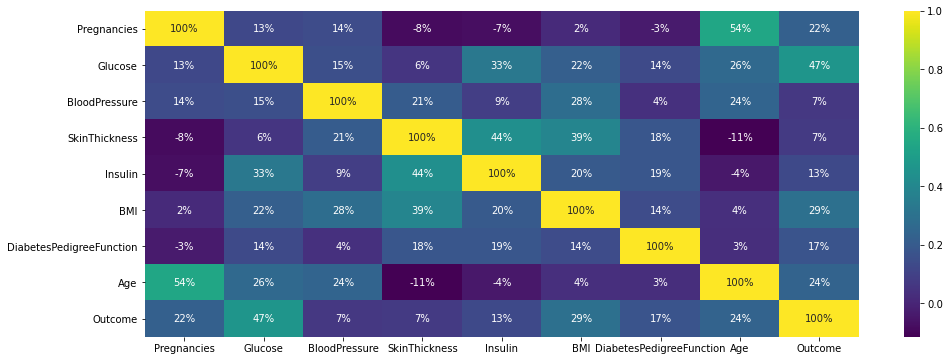

In [10]:
plt.figure(figsize=(16,6))
sns.heatmap(diab_df.corr(), annot=True, fmt='.0%',cmap='viridis');

The heatmap shows that Glucose and BMI are slightly correlated with the disease outcome, though it is not very strong correlation

Pregnancies and age seem to be correlated. But besides these there doesn't seem to be much correlation between features and with the outcome

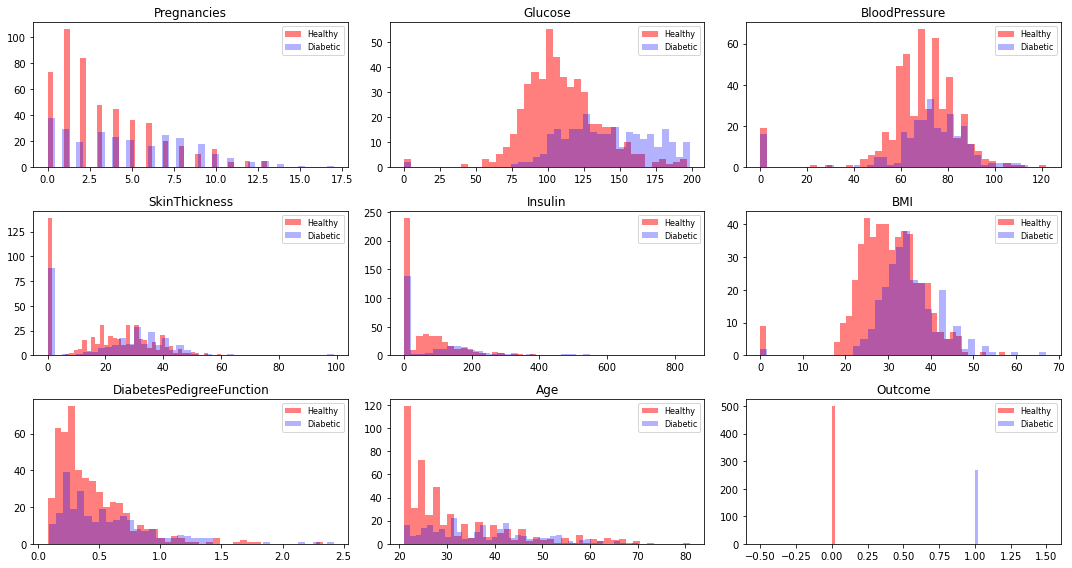

In [14]:
_, axes = plt.subplots(3,3, figsize=(15, 8))

healthy = diab_df[diab_df['Outcome']==0]              
diabetic = diab_df[diab_df['Outcome']==1]

ax = axes.ravel()                     # flatten the 2D array
for i in range(9):                   # for each of the 30 features
    bins = 40
    
    #---plot histogram for each feature---
    ax[i].hist(healthy.iloc[:,i], bins=bins, color='r', alpha=.5)
    ax[i].hist(diabetic.iloc[:,i], bins=bins, color='b', alpha=0.3)
    
    #---set the title---
    ax[i].set_title(diab_df.columns[i], fontsize=12)   
    
    #---display the legend---
    ax[i].legend(['Healthy','Diabetic'], loc='best', fontsize=8)
    
    
plt.tight_layout()
plt.savefig("histograms.png")

plt.show()



# Source: https://medium.com/towards-data-science/using-principal-component-analysis-pca-for-machine-learning-b6e803f5bf1e

The above set of histograms reveal that blood glucose and BMI seem to be the best predictors. This is because, there is clear separation between the diabetic and the non-diabetic group with glucose and BMI. 

With other features the separation is not clear, and they are overlapping

In [8]:
diab_df_corr = diab_df.corr()['Outcome'].abs().sort_values(ascending=False)
diab_df_corr

# This again shows that Glucose and BMI have the highest correlation among the various features with the diease outcome

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [9]:
display(diab_df['Outcome'].value_counts())
diab_df['Outcome'].value_counts(normalize=True)

# This is a slightly unbalanced set, but we'll use as it is. We won't run SMOTE as from my previous experiences, SMOTE increases
# false negatives. With healthcare data, decreasing false negatives is a priority even if the accuracy is relatively low

0    500
1    268
Name: Outcome, dtype: int64

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

## 4. Models

### 4a. RandomForest Classifier

### Train Test Split 

In [47]:
diab_df_rfc = diab_df.copy()

In [48]:
X = diab_df_rfc.iloc[:,0:8]

In [49]:
y = diab_df_rfc.iloc[:,8]

In [13]:
from sklearn.model_selection import train_test_split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Hyperparameter Tuning

In [15]:
from sklearn.model_selection import GridSearchCV

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
n_estimators = [64,100,128,200]

In [19]:
max_features = ['sqrt','log2']

# the parameter 'auto' has been deprecated so leaving it out

In [20]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features}

In [21]:
rfc = RandomForestClassifier()

In [22]:
grid = GridSearchCV(rfc,param_grid)

In [23]:
grid.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [64, 100, 128, 200]})

In [24]:
grid.best_params_

{'max_features': 'sqrt', 'n_estimators': 128}

### Random Forest Classifier

In [71]:
rfc = RandomForestClassifier(n_estimators=128,max_features='sqrt',oob_score=True,random_state=101)

In [72]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=128, oob_score=True, random_state=101)

In [73]:
y_pred = rfc.predict(X_test)

### Model Evaluation

In [28]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report,accuracy_score,recall_score

In [74]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       103
           1       0.64      0.59      0.61        51

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.75      0.75      0.75       154



C:\Users\sankara.b.narayanan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


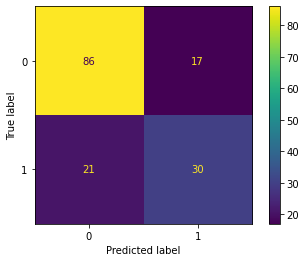

In [75]:
plot_confusion_matrix(rfc,X_test,y_test)

### Feature Importance

In [76]:
rfc.feature_importances_

array([0.08402184, 0.25182057, 0.08477494, 0.06734233, 0.0698825 ,
       0.17245594, 0.13307007, 0.13663181])

In [77]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [78]:
imp_feat = pd.DataFrame(index=X.columns,data=rfc.feature_importances_,columns=['Feature Importance']).sort_values('Feature Importance',ascending=False)

In [36]:
imp_feat

,Feature Importance
Glucose,0.252184
BMI,0.168882
Age,0.134802
DiabetesPedigreeFunction,0.132323
BloodPressure,0.089244
Pregnancies,0.083615
SkinThickness,0.072120
Insulin,0.066830


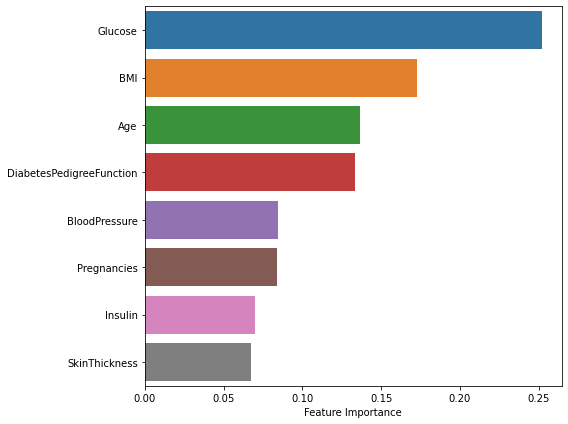

In [119]:
plt.figure(figsize=(8,6))
sns.barplot(data=imp_feat,x='Feature Importance',y=imp_feat.index,orient='h')
plt.tight_layout()

# For horizontal plot to work, the x axis should be numeric else this won't work

### 4b. XGBoost without hyperparameter tuning

### Train Test Split 

In [50]:
diab_df_xgb = diab_df.copy()

In [51]:
X = diab_df_xgb.iloc[:,0:8]

In [52]:
y = diab_df_xgb.iloc[:,8]

In [53]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### XGBoost model

In [81]:
import xgboost as xgb

In [82]:
model = xgb.XGBClassifier()

In [83]:
model.fit(X_train, y_train)

[19:03:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sankara.b.narayanan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sankara.b.narayanan\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
predictions = model.predict(X_test)

### Model Evaluation

In [60]:
from sklearn.metrics import accuracy_score

In [69]:
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 74.03%


### 4c. XGBoost with hyperparameter tuning

### Train Test Split 

In [85]:
X = diab_df_xgb.iloc[:,0:8]

In [86]:
y = diab_df_xgb.iloc[:,8]

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Hyperparameter Tuning

In [95]:
eval_set = [(X_test, y_test)]

In [91]:
from sklearn.model_selection import GridSearchCV

In [90]:
from sklearn.model_selection import RandomizedSearchCV

In [101]:
params = {'max_depth': [3, 6, 10, 15],
              'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4],
              'subsample': np.arange(0.5, 1.0, 0.1),
              'colsample_bytree': np.arange(0.5, 1.0, 0.1),
              'colsample_bylevel': np.arange(0.5, 1.0, 0.1),
              'n_estimators': [100, 250, 500, 750],
         }

# The https://www.anyscale.com/blog/how-to-tune-hyperparameters-on-xgboost soure used 'num_class': [10] as one of the params
# But they had used objective="multi:softmax" in the next step, but I am using default 'binary:logistic'
# Apparently num_class doesn't work with 'binary:logistic', so removed num_class from params

# Found the resolution here
# # https://github.com/dmlc/xgboost/issues/2563

In [102]:
xgb_clf = xgb.XGBClassifier()

In [103]:
clf = RandomizedSearchCV(estimator=xgbclf,
                             param_distributions=params,
                             scoring='accuracy',
                             n_iter=25,
                             n_jobs=4,
                             verbose=1)

In [104]:
clf.fit(X_train,y_train)

# https://www.anyscale.com/blog/how-to-tune-hyperparameters-on-xgboost
# https://www.datasnips.com/5/tuning-xgboost-with-grid-search/
# ML Mastery mail 3
# https://github.com/dmlc/xgboost/issues/2563

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[19:25:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\sankara.b.narayanan\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\sankara.b.narayanan\Anaconda3\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


RandomizedSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           enable_categorical=False, gamma=None,
                                           gpu_id=None, importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=25, n_jobs=4,
                   param_distributions={'colsample_bylevel': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'colsample_bytree': array([0.5, 0.6, 0.7, 0.8, 0.9]),
                                        'learning_rate': [0.01, 0.1, 0.2, 0.3,
                                                          0.4],
                                        'max_depth': [3, 6, 10, 15],
                                        'n_estimators': [100, 250, 500, 750],
                                        'subsample': array([0.5, 0.6, 0.7, 0.8, 0.9])},
                   scoring='accuracy', verbose=1)

In [105]:
clf.best_params_

{'subsample': 0.7,
 'n_estimators': 100,
 'max_depth': 3,
 'learning_rate': 0.01,
 'colsample_bytree': 0.8999999999999999,
 'colsample_bylevel': 0.7999999999999999}

### XGBoost model

In [108]:
xgb_model = xgb.XGBClassifier(subsample=0.7,n_estimators=100,max_depth=3,learning_rate=0.01,
                              colsample_bytree=0.9,colsample_bylevel=0.8)

In [109]:
xgb_model.fit(X_train,y_train)

[19:31:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.8,
              colsample_bynode=1, colsample_bytree=0.9,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.7, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [110]:
y_pred = xgb_model.predict(X_test)

### Model Evaluation

In [111]:
from sklearn.metrics import accuracy_score

In [112]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 79.22%


### Feature Importance

In [114]:
from xgboost import plot_importance

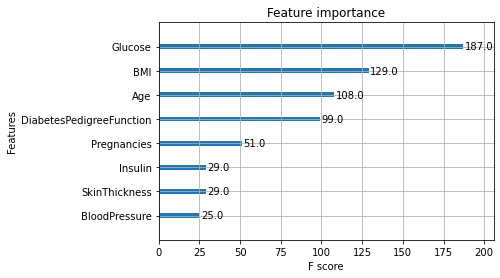

In [120]:
plot_importance(xgb_model);

In [84]:
# https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/blob/master/Pima%20Indians%20Diabetes%20Dataset.ipynb
# https://www.datacamp.com/tutorial/xgboost-in-python
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
# https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn